# A Visual History of Nobel Prize Winners

## 1. The most Nobel of Prizes

![](img/Nobel_Prize.png)

The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories **chemistry**, **literature**, **physics**, **physiology** or **medicine**, **economics**, and **peace**. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. *Surely. Right?*

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [1]:
# Load in required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Set the plotting theme
sns.set()

# Show plots in notebook
%matplotlib inline

# Set size and fontsize parameters for all plots
plt.rcParams['figure.figsize'] = (11, 7)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)

In [2]:
# Read in the Nobel PRize Data
nobel = pd.read_csv("datasets/archive.csv")

In [3]:
# Print the first 6 rows
nobel.head(6)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. Data Cleaning

In [4]:
# Print information about the DataFrame
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [5]:
# See the number of missing values in all columns
nobel.isna().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [6]:
# Inspect the DataFrame based on missing values in specific columns
nobel[nobel["Motivation"].isna()].head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom


In [7]:
# Inspect the DataFrame based on missing values in specific columns
nobel[nobel["Birth Date"].isna()].head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Show duplicate rows based on columns that should be unique to each laureate
nobel[nobel.duplicated(subset=["Year", "Category", "Full Name", "Birth Date"], keep=False)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany
157,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,University of Heidelberg,Heidelberg,Germany,1940-04-26,Heidelberg,Germany
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,1940-04-26,Heidelberg,Germany
159,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,University of Heidelberg,Heidelberg,Germany,1949-03-30,Buenos Aires,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",United States of America,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN


In [9]:
# Drop duplicates
nobel.drop_duplicates(subset=["Year", "Category", "Full Name", "Birth Date"], inplace=True)

In [10]:
# Check date format in `Birth Date`
nobel[nobel["Birth Date"].str.contains("00-00", na=False)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
342,1960,Peace,The Nobel Peace Prize 1960,NaN,1/1,519,Individual,Albert John Lutuli,1898-00-00,Bulawayo,Southern Rhodesia (Zimbabwe),Male,NaN,NaN,NaN,1967-07-21,Stanger,South Africa
748,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,A. Michael Spence,1943-00-00,"Montclair, NJ",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN


In [11]:
# replace both birth date to either a normal or the actual dates
nobel.loc[342, "Birth Date"] = "1898-01-01"
nobel.loc[748, "Birth Date"] = "1943-11-07"

In [12]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel["Birth Date"])

## 3. So, who gets the Nobel Prize?

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For country, we will use the `birth_country` of the winner, as the `organization_country` is NaN for all shared Nobel Prizes.)

In [13]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
print(f"Number of (possibly shared) Nobel Prizes handed out between 1901 and 2016: {len(nobel)}")

Number of (possibly shared) Nobel Prizes handed out between 1901 and 2016: 911


In [14]:
# Display the number of prizes won by male and female recipients.
sex_prizes_count = nobel["Sex"].value_counts()
print(f"Number of prizes won by male recipients: {sex_prizes_count[0]}")
print(f"Number of prizes won by female recipients: {sex_prizes_count[1]}")

Number of prizes won by male recipients: 836
Number of prizes won by female recipients: 49


In [15]:
# Display the number of prizes won by the top 10 nationalities.
nobel["Birth Country"].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: Birth Country, dtype: int64

## 4. USA dominance

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [16]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["Birth Country"].apply(lambda birth_country: birth_country == "United States of America")
nobel['decade'] = nobel["Year"].apply(lambda year: (np.floor(year / 10) * 10).astype(int))
prop_usa_winners = nobel.groupby(by="decade", as_index=False)["usa_born_winner"].mean()

In [17]:
# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 5. USA dominance, visualized

A table is OK, but to see when the USA started to dominate the Nobel charts, we need a plot!

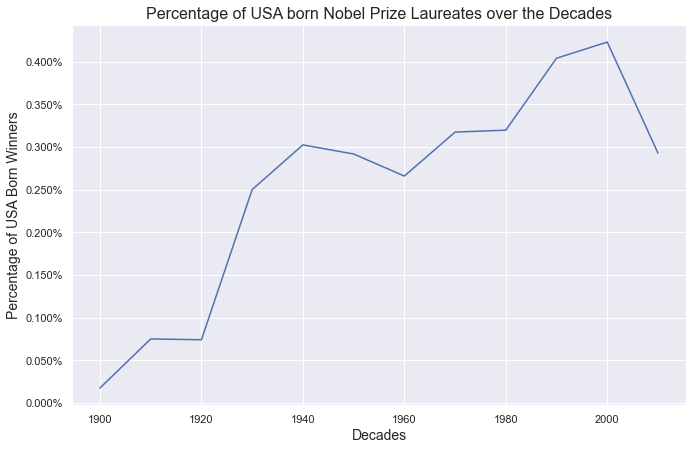

In [18]:
# Plotting USA born winners 
ax = sns.lineplot(x="decade", y="usa_born_winner", data=prop_usa_winners)

# Adding title to the plot
ax.set_xlabel("Decades")
ax.set_ylabel("Percentage of USA Born Winners")
ax.set_title("Percentage of USA born Nobel Prize Laureates over the Decades")

# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## 6. What is the gender of a typical Nobel Prize winner?

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

In [19]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["Sex"].apply(lambda sex: sex == "Female")
prop_female_winners = nobel.groupby(by=["decade", "Category"], as_index=False)["female_winner"].mean()

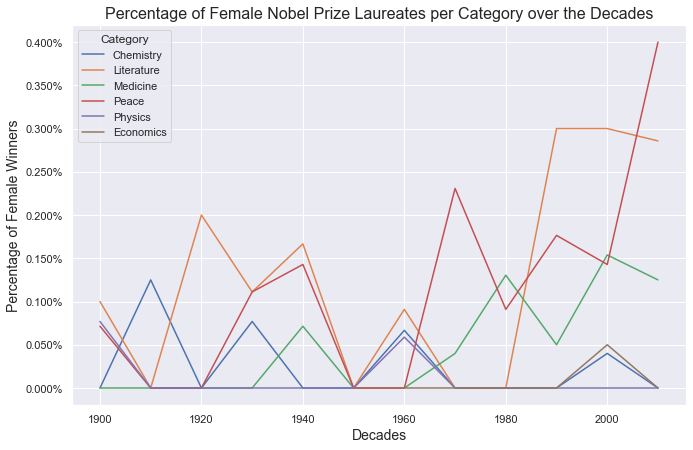

In [20]:
# Plotting USA born winners
ax = sns.lineplot(x="decade", y="female_winner", data=prop_female_winners, hue="Category")

# Adding axes labels to the plot
ax.set_xlabel("Decades", fontsize=14)
ax.set_ylabel("Percentage of Female Winners", fontsize=14)
ax.set_title("Percentage of Female Nobel Prize Laureates per Category over the Decades", fontsize=16)

# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## 7. The first woman to win the Nobel Prize

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [21]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel["female_winner"]].nsmallest(n=1, columns="Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 8. Repeat laureates

For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)

In [22]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby(by=["Full Name"]).filter(lambda group: len(group) > 1)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
289,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
312,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
320,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
357,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## 9. How old are you when you get the prize?

The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

In [23]:
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["Year"] - nobel["Birth Date"].dt.year

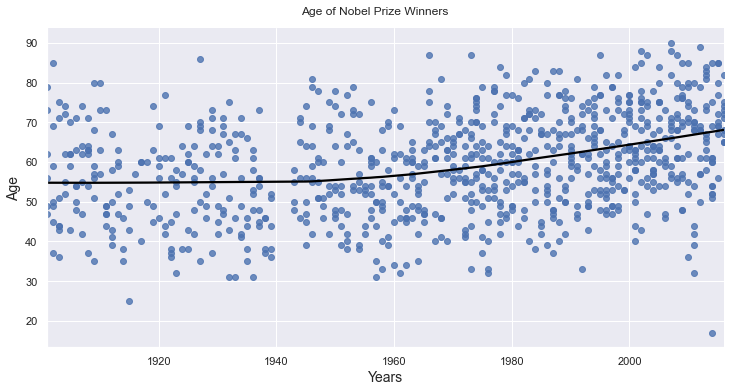

In [24]:
# Plotting the age of Nobel Prize winners
ax = sns.lmplot(x="Year", y="age", data=nobel, lowess=True, aspect=2, line_kws={"color": "black"})

# Adding axes labels to the plot
ax.set(xlabel="Years", ylabel="Age")
ax.fig.suptitle("Age of Nobel Prize Winners", y=1.03);

## 10. Age differences between prize categories

The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

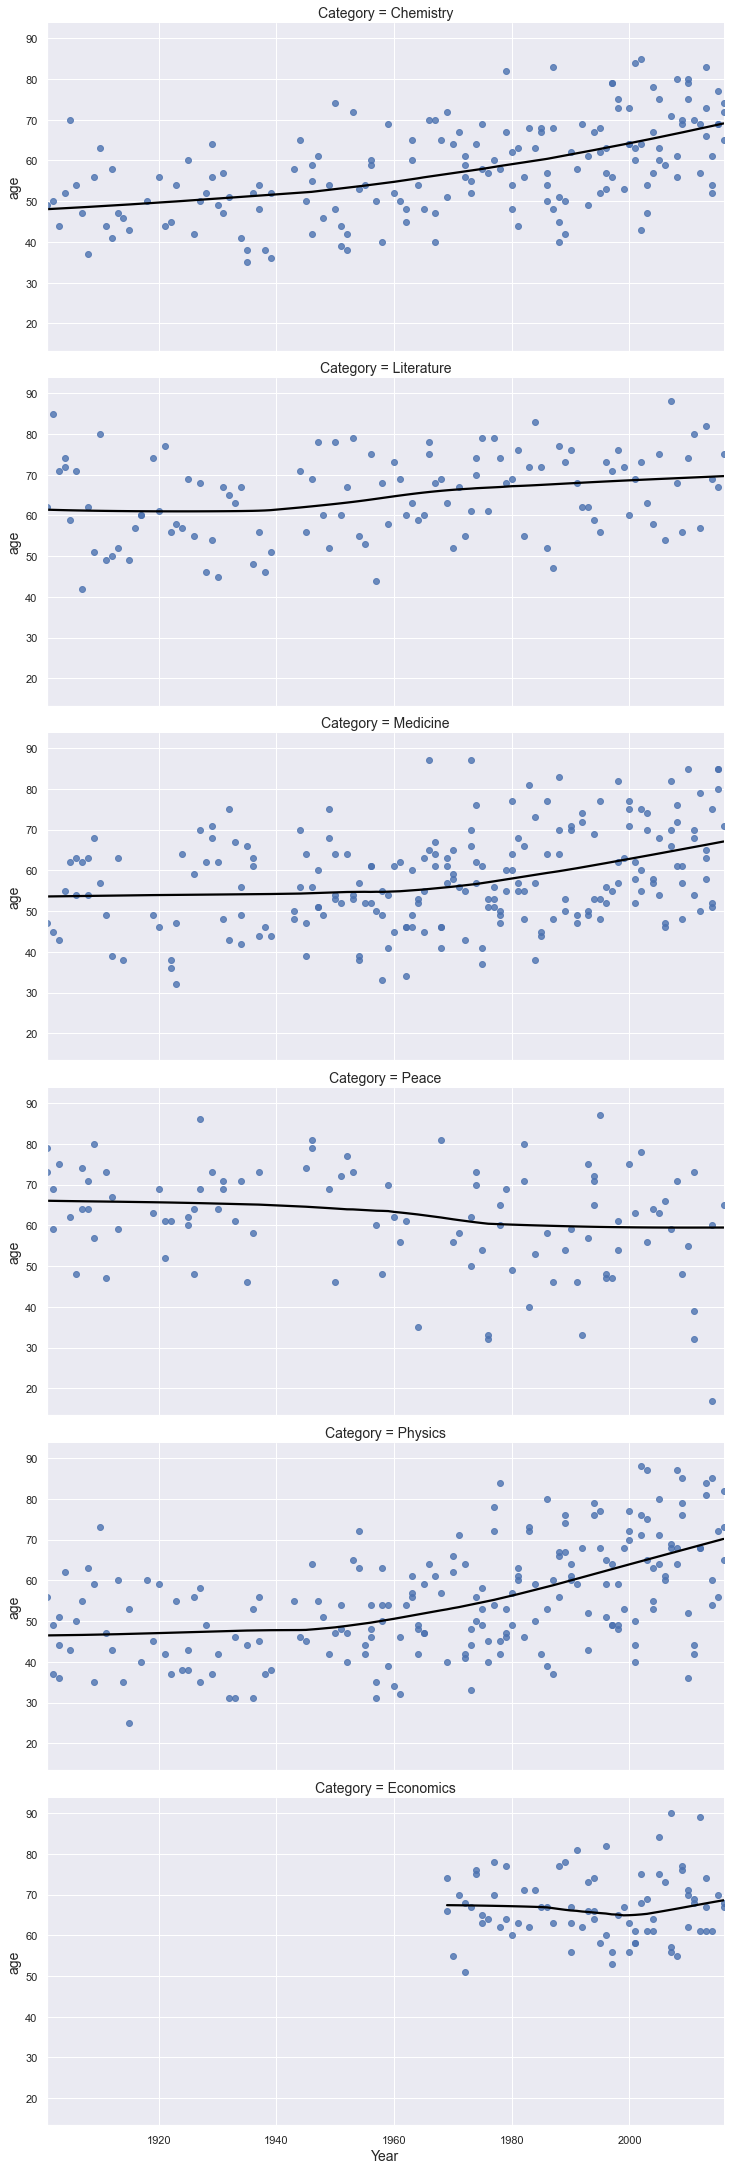

In [25]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x="Year", y="age", data=nobel, row="Category", lowess=True, aspect=2, line_kws={"color": "black"});

## 11. Oldest and youngest winners

More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [26]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(n=1, columns="age"))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


In [27]:
# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(n=1, columns="age")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
